In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.special import softmax
from scipy.special import i0

In [2]:
%matplotlib inline

In [3]:
np.random.seed(0)

# Helper functions

In [4]:
def relu(X):
    return np.maximum(0, X)

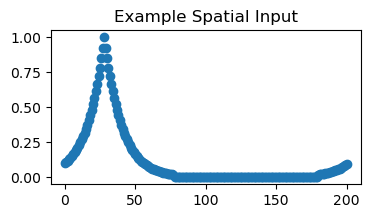

In [5]:
def make_bump(size, center):
    """
    Generates an exponential falloff.
    """
    
    assert(center < size)
    x = np.linspace(0, 100)
    halfbump = np.exp(-0.04*x)
    halfbump = halfbump/halfbump.max()
    bump = np.zeros(size)
    bump[:halfbump.size] = halfbump
    bump[-halfbump.size+1:] = halfbump[1:][::-1]
    offset = 0.
    bump = bump - offset
    bump[bump < 0] = 0
    bump /= bump.max()
    bump = np.roll(bump, center)
    return bump

plt.figure(figsize=(4,2))
plt.scatter(np.arange(201), make_bump(201, 28))
plt.title('Example Spatial Input')
plt.show()

# Dynamics Function

In [6]:
def get_activity(J, i, T=20):
    """
    Runs T timesteps of dynamics given
    constant input i
    """
    
    x = x_prev = np.zeros(i.size)
    x_prev = i
    activities = []
    for t in range(T):
        x = J@(x_prev) + i
        x = x/x.max()
        
        x[np.abs(x) < 0.5] = 0
        x_prev = x
        activities.append(x)
    return activities[-1]

def get_activity_linear(J, i, gamma=0.7):
    return np.inv(np.eye(J.shape[0]) - gamma*J) @ i

# Network initializations

In [7]:
n_place = 100
n_barcode = 100
n_cache = 1

In [8]:
seed_locs = [int(n_place*0.3)]
print(f'Caches at locations {seed_locs}')

Caches at locations [30]


In [9]:
J_pb = np.eye(n_barcode, n_place)

J_pb =  np.random.randn(n_barcode, n_place)
J_pb[np.abs(J_pb)<0.8] = 0
J_pb[J_pb<0] = -1
J_pb[J_pb>0] = 1
J_pb *= 0.1

J_pb =  np.random.randn(n_barcode, n_place)*0.15

In [10]:
J_bb = np.random.randn(n_barcode, n_barcode) * 0.2

In [11]:
J_cb = np.zeros(n_barcode)

# No learning has happened

In [12]:
Xb = []
for p in range(n_place):
    i = make_bump(n_place, p)
    xb = get_activity(J_bb, J_pb@i)
    Xb.append(xb)
Xb = np.array(Xb)

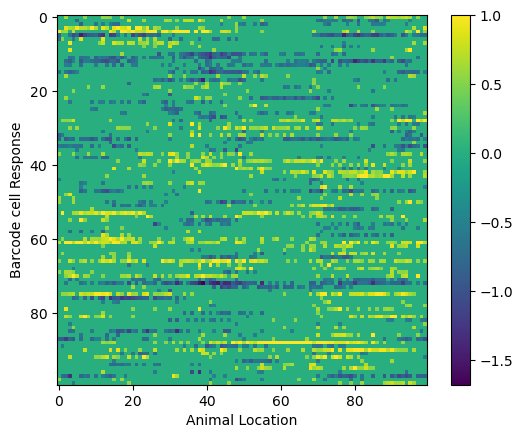

In [13]:
plt.figure()
plt.imshow(Xb.T)
plt.colorbar()
plt.xlabel('Animal Location')
plt.ylabel('Barcode cell Response')
plt.show()

In [14]:
barcodes = Xb.copy() # (location, cell response)

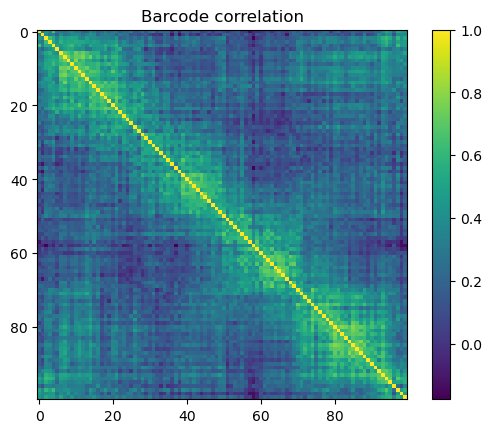

In [15]:
plt.figure()
plt.imshow(np.corrcoef(barcodes))
plt.colorbar()
plt.title('Barcode correlation')
plt.show()

# Learning has happened

In [16]:
for seed_loc in seed_locs:
    fixed_pt = barcodes[seed_loc, :]
    J_bb += 0.15 * np.outer(fixed_pt, fixed_pt)
    J_cb += fixed_pt

# Fantasy mode on 

In [17]:
A = 1

In [18]:
Xb = []
for p in range(n_place):
    i = make_bump(n_place, p)
    xb = get_activity(J_bb, J_pb@i + A*(J_cb))
    Xb.append(xb)
Xb = np.array(Xb)

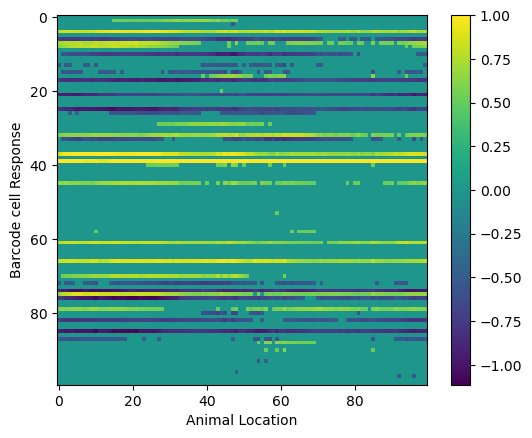

In [19]:
plt.figure()
plt.imshow(Xb.T)
plt.colorbar()
plt.xlabel('Animal Location')
plt.ylabel('Barcode cell Response')
plt.show()

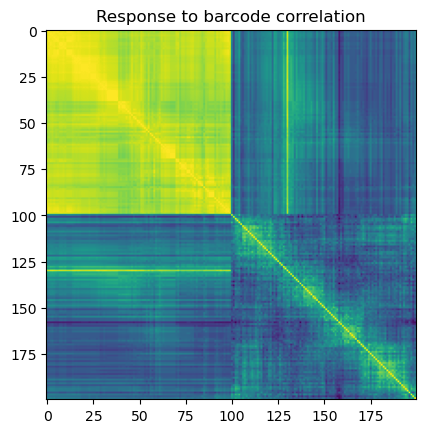

In [20]:
plt.figure()
plt.imshow(np.corrcoef(Xb, barcodes))
plt.title('Response to barcode correlation')
plt.show()

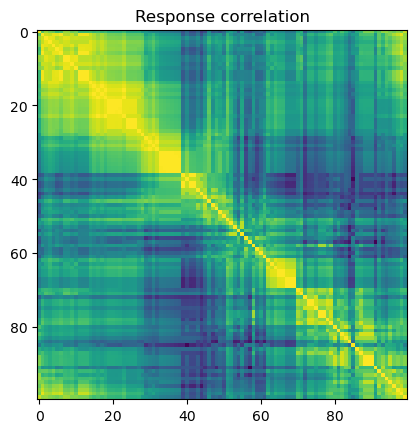

In [21]:
plt.figure()
plt.imshow(np.corrcoef(Xb))
plt.title('Response correlation')
plt.show()

# Fantasy mode off

In [22]:
A = -1

In [23]:
Xb = []
for p in range(n_place):
    i = make_bump(n_place, p)
    xb = get_activity(J_bb, J_pb@i + A*(J_cb))
    Xb.append(xb)
Xb = np.array(Xb)

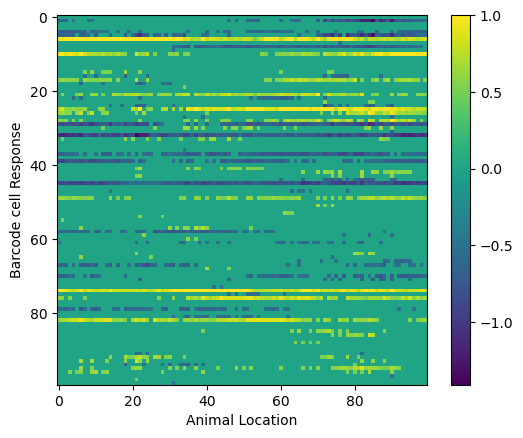

In [24]:
plt.figure()
plt.imshow(Xb.T)
plt.colorbar()
plt.xlabel('Animal Location')
plt.ylabel('Barcode cell Response')
plt.show()

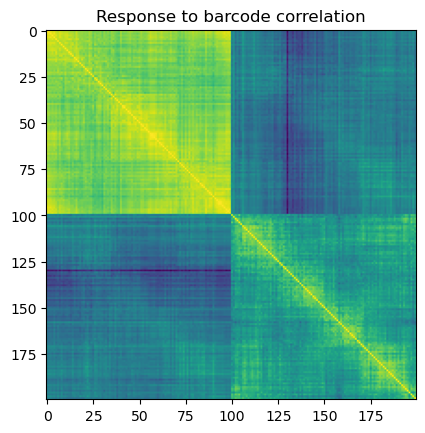

In [25]:
plt.figure()
plt.imshow(np.corrcoef(Xb, barcodes))
plt.title('Response to barcode correlation')
plt.show()

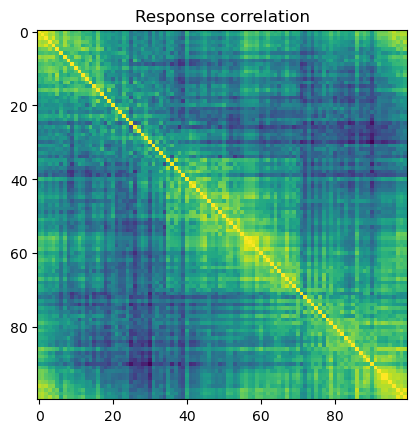

In [26]:
plt.figure()
plt.imshow(np.corrcoef(Xb))
plt.title('Response correlation')
plt.show()